# Image Metrics Example
Adapted from [SciKit-Image: Structural similarity index](http://scikit-image.org/docs/dev/auto_examples/plot_ssim.html).

**Note:**
*There seem to be some minor numerical instabilities on GPU.*

In [1]:
# Force matplotlib to use inline rendering
%matplotlib inline

import os
import sys

# add path to libraries for ipython
sys.path.append(os.path.expanduser("~/libs"))

import numpy as np
import tensorflow as tf
import tensortools as tt

from skimage import data, img_as_float
from scipy.misc import imresize

In [2]:
image = data.camera()
img = img_as_float(image)
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
noise[np.random.random(size=noise.shape) > 0.5] *= -1

# a) Noise
img_noise = img + noise

# b) Constant noise
img_const = img + abs(noise)

# c) Scaled (center)
img_scaled = imresize(img, (512, 600))
s = img_scaled.shape
border = (s[1] - s[0]) // 2
img_scaled = img_scaled[:, border:s[0]+border]
img_scaled = img_as_float(img_scaled)

# d) Scaled (left part)
img_scaled_left = imresize(img, (512, 550))
img_scaled_left = img_scaled_left[:, 0:512]
img_scaled_left = img_as_float(img_scaled_left)

In [3]:
image1 = tf.placeholder(tf.float32, shape=[rows, cols])
image2 = tf.placeholder(tf.float32, shape=[rows, cols])

def image_to_4d(image):
    image = tf.expand_dims(image, 0) # BATCH_SIZE = 1
    image = tf.expand_dims(image, -1) # CHANNELS = 1
    return image

image4d_1 = image_to_4d(image1)
image4d_2 = image_to_4d(image2)

ssim_index = tt.loss.ssim(image4d_1, image4d_2)
msssim_index = tt.loss.ms_ssim(image4d_1, image4d_2)

mse = tt.loss.image_mse(image4d_1, image4d_2)
rmse = tt.loss.image_rmse(image4d_1, image4d_2)
mae = tt.loss.image_mae(image4d_1, image4d_2)
rmae = tt.loss.image_rmae(image4d_1, image4d_2)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    mse_none = sess.run(mse,
                        feed_dict={image1: img, image2: img})
    mse_noise = sess.run(mse,
                         feed_dict={image1: img, image2: img_noise})
    mse_const = sess.run(mse,
                         feed_dict={image1: img, image2: img_const})
    mse_scaled = sess.run(mse,
                          feed_dict={image1: img, image2: img_scaled})
    mse_scaled_left = sess.run(mse,
                               feed_dict={image1: img, image2: img_scaled_left})
    
    rmse_none = sess.run(rmse,
                         feed_dict={image1: img, image2: img})
    rmse_noise = sess.run(rmse,
                          feed_dict={image1: img, image2: img_noise})
    rmse_const = sess.run(rmse,
                          feed_dict={image1: img, image2: img_const})
    rmse_scaled = sess.run(rmse,
                           feed_dict={image1: img, image2: img_scaled})
    rmse_scaled_left = sess.run(rmse,
                                feed_dict={image1: img, image2: img_scaled_left})
    
    mae_none = sess.run(mae,
                        feed_dict={image1: img, image2: img})
    mae_noise = sess.run(mae,
                         feed_dict={image1: img, image2: img_noise})
    mae_const = sess.run(mae,
                         feed_dict={image1: img, image2: img_const})
    mae_scaled = sess.run(mae,
                          feed_dict={image1: img, image2: img_scaled})
    mae_scaled_left = sess.run(mae,
                               feed_dict={image1: img, image2: img_scaled_left})
    
    rmae_none = sess.run(rmae,
                         feed_dict={image1: img, image2: img})
    rmae_noise = sess.run(rmae,
                          feed_dict={image1: img, image2: img_noise})
    rmae_const = sess.run(rmae,
                          feed_dict={image1: img, image2: img_const})
    rmae_scaled = sess.run(rmae,
                           feed_dict={image1: img, image2: img_scaled})
    rmae_scaled_left = sess.run(rmae,
                                feed_dict={image1: img, image2: img_scaled_left})

    ssim_none = sess.run(ssim_index,
                         feed_dict={image1: img, image2: img})
    ssim_noise = sess.run(ssim_index,
                          feed_dict={image1: img, image2: img_noise})
    ssim_const = sess.run(ssim_index,
                          feed_dict={image1: img, image2: img_const})
    ssim_scaled = sess.run(ssim_index,
                           feed_dict={image1: img, image2: img_scaled})
    ssim_scaled_left = sess.run(ssim_index,
                                feed_dict={image1: img, image2: img_scaled_left})

    msssim_none = sess.run(msssim_index,
                           feed_dict={image1: img, image2: img})
    msssim_noise = sess.run(msssim_index,
                            feed_dict={image1: img, image2: img_noise})
    msssim_const = sess.run(msssim_index,
                            feed_dict={image1: img, image2: img_const})
    msssim_scaled = sess.run(msssim_index,
                             feed_dict={image1: img, image2: img_scaled})
    msssim_scaled_left = sess.run(msssim_index,
                                  feed_dict={image1: img, image2: img_scaled_left})

print('### None:')
print('MSE: {}'.format(mse_none))
print('RMSE: {}'.format(rmse_none))
print('MAE: {}'.format(mae_none))
print('RMAE: {}'.format(rmae_none))
print('SSIM: {}'.format(ssim_none))
print('MS-SSIM: {}'.format(msssim_none))
print
print('### Noise:')
print('MSE: {}'.format(mse_noise))
print('RMSE: {}'.format(rmse_noise))
print('MAE: {}'.format(mae_noise))
print('RMAE: {}'.format(rmae_noise))
print('SSIM: {}'.format(ssim_noise))
print('MS-SSIM: {}'.format(msssim_noise))
print
print('### Constant noise:')
print('MSE: {}'.format(mse_const))
print('RMSE: {}'.format(rmse_const))
print('MAE: {}'.format(mae_const))
print('RMAE: {}'.format(rmae_const))
print('SSIM: {}'.format(ssim_const))
print('MS-SSIM: {}'.format(msssim_const))
print
print('### Scaled (center):')
print('MSE: {}'.format(mse_scaled))
print('RMSE: {}'.format(rmse_scaled))
print('MAE: {}'.format(mae_scaled))
print('RMAE: {}'.format(rmae_scaled))
print('SSIM: {}'.format(ssim_scaled))
print('MS-SSIM: {}'.format(msssim_scaled))
print
print('### Scaled (left):')
print('MSE: {}'.format(mse_scaled_left))
print('RMSE: {}'.format(rmse_scaled_left))
print('MAE: {}'.format(mae_scaled_left))
print('RMAE: {}'.format(rmae_scaled_left))
print('SSIM: {}'.format(ssim_scaled_left))
print('MS-SSIM: {}'.format(msssim_scaled_left))

### None:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
RMAE: 0.0
SSIM: 1.0
MS-SSIM: 1.00000059605

### Noise:
MSE: 10485.7509766
RMSE: 102.39995575
MAE: 52428.8242188
RMAE: 228.973419189
SSIM: 0.105796463788
MS-SSIM: 0.532718241215

### Constant noise:
MSE: 10485.7509766
RMSE: 102.39995575
MAE: 52428.8242188
RMAE: 228.973419189
SSIM: 0.836651921272
MS-SSIM: 0.977658390999

### Scaled (center):
MSE: 7938.65234375
RMSE: 89.0991134644
MAE: 22488.8554688
RMAE: 149.96282959
SSIM: 0.615583896637
MS-SSIM: 0.584760308266

### Scaled (left):
MSE: 8707.83300781
RMSE: 93.3157730103
MAE: 23323.2421875
RMAE: 152.719482422
SSIM: 0.592855274677
MS-SSIM: 0.501646995544


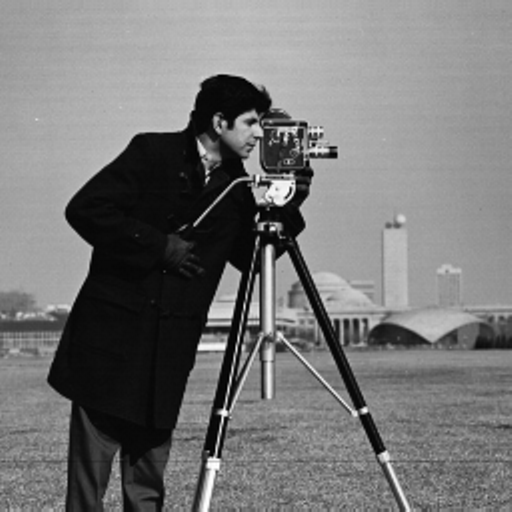

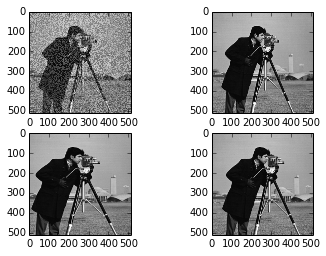

In [5]:
tt.visualization.display_array(img*255)
tt.visualization.display_batch([img_noise, img_const, img_scaled, img_scaled_left])